In [1]:
"""
Logistic Regression - No Framework Implementation
Built from scratch using only NumPy.
"""

import numpy as np
import json
import sys
sys.path.append('../..')

# Self created utilities
from utils.metrics import accuracy, precision, recall, f1_score, auc_score
from utils.performance import track_performance
from utils.visualization import (
    plot_cost_curve,
    plot_confusion_matrix,
    plot_roc_curve,
    plot_feature_importance
)

# Load preprocessed data (already scaled, SMOTE applied, 50/50 balanced)
X_train = np.load('../../data/processed/logistic_regression/X_train.npy')
X_test = np.load('../../data/processed/logistic_regression/X_test.npy')
y_train = np.load('../../data/processed/logistic_regression/y_train.npy')
y_test = np.load('../../data/processed/logistic_regression/y_test.npy')

# Load metadata for feature names
with open('../../data/processed/logistic_regression/preprocessing_info.json') as f:
    meta = json.load(f)
feature_names = meta['feature_names']

print(f"Training: {X_train.shape[0]:,} samples, {X_train.shape[1]} features")
print(f"Test: {X_test.shape[0]:,} samples")
print(f"Class balance - Train: {np.mean(y_train):.1%} fraud")
print(f"Class balance - Test: {np.mean(y_test):.1%} fraud")

Training: 454,902 samples, 30 features
Test: 56,962 samples
Class balance - Train: 50.0% fraud
Class balance - Test: 0.2% fraud


In [2]:
# Core functions for logistic regression

def sigmoid(z):
    """
    Sigmoid activation function.
    Maps any real number to (0, 1) range - perfect for probability output.
    """
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))

def binary_cross_entropy(y_true, y_pred):
    """
    Binary Cross-Entropy Loss (Log Loss).
    Measures how well predicted probabilities match actual labels.

    Formula: -[y*log(p) + (1-y)*log(1-p)]
    - When y=1: loss = -log(p)     → penalizes low probability for fraud
    - When y=0: loss = -log(1-p)   → penalizes high probability for legit
    """
    # Clip predictions to avoid log(0)
    eps = 1e-15
    y_pred = np.clip(y_pred, eps, 1 - eps)

    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

In [3]:
# Training: Gradient Descent

# Hyperparameters
learning_rate = 0.1
n_iterations = 1000

# Initalize weights and bias to zero
n_features = X_train.shape[1]
weights = np.zeros(n_features)
bias = 0.0

# Track cost history for visualization
cost_history = []

# Training loop with performance tracking
with track_performance() as perf:
    for i in range(n_iterations):
        # Forward pass: compute predictions
        z = np.dot(X_train, weights) + bias     # Linear combination
        y_pred = sigmoid(z)                     # Apply sigmoid for probabilities

        # Compute cost (for monitoring, not used in gradients)
        cost = binary_cross_entropy(y_train, y_pred)
        cost_history.append(cost)

        # Compute gradients (derivative of cost w.r.t. weights and bias)
        # These come from calculus - the chain rule applied to BCE + sigmoid
        error = y_pred - y_train                        # (predictions - actual)
        dw = np.dot(X_train.T, error) / len(y_train)    # Gradient for weights
        db = np.mean(error)                             # Gradient for bias

        # Update parameters (move opposite to gradient direction)
        weights -= learning_rate * dw
        bias -= learning_rate * db

        # Print progress every 100 iterations
        if (i + 1) % 100 == 0:
            print(f"Iteration {i+1:4d} | Cost: {cost:.6f}")

print(f"\nTraining complete!")
print(f"Time: {perf['time']:.2f} sec | Memory: {perf['memory']:.2f} MB")

Iteration  100 | Cost: 0.144255
Iteration  200 | Cost: 0.100753
Iteration  300 | Cost: 0.083974
Iteration  400 | Cost: 0.075091
Iteration  500 | Cost: 0.069554
Iteration  600 | Cost: 0.065747
Iteration  700 | Cost: 0.062953
Iteration  800 | Cost: 0.060806
Iteration  900 | Cost: 0.059100
Iteration 1000 | Cost: 0.057708

Training complete!
Time: 18.53 sec | Memory: 27.87 MB


In [4]:
# Evaluation on Test Set

# Get predictions on test set
z_test = np.dot(X_test, weights) + bias
y_proba = sigmoid(z_test)               # Probabilities (0 to 1)
y_pred = (y_proba >= 0.5).astype(int)   # Binary predictions (0 or 1)

# Calculate metrics using the shared utilities
acc = accuracy(y_test, y_pred)
prec = precision(y_test, y_pred)
rec = recall(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = auc_score(y_test, y_pred)

# Print results
print("=" * 40)
print("TEST SET RESULTS")
print("=" * 40)
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"AUC-ROC:   {auc:.4f}")

TEST SET RESULTS
Accuracy:  0.9889
Precision: 0.1167
Recall:    0.8265
F1 Score:  0.2045
AUC-ROC:   0.9034


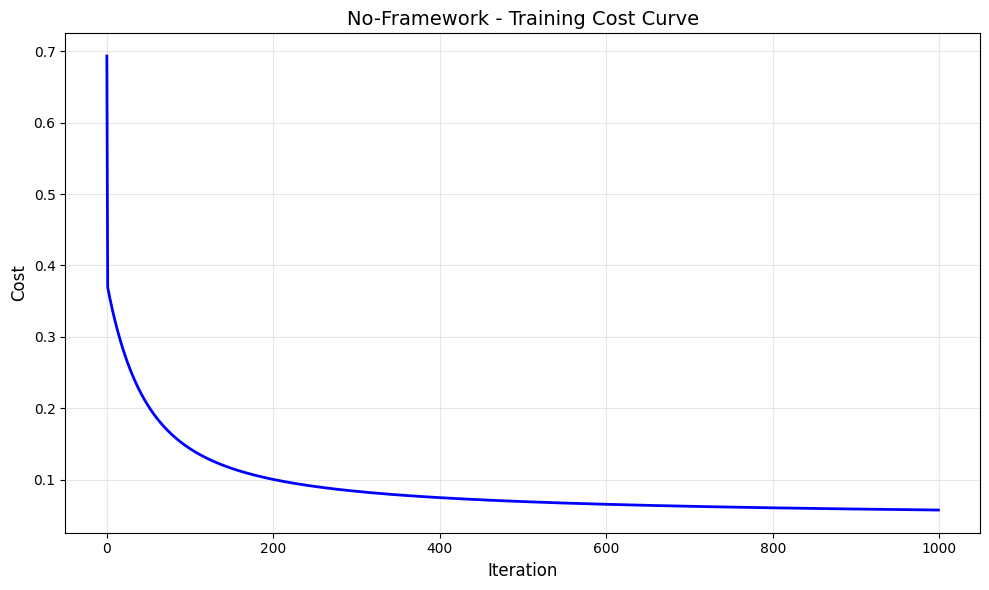

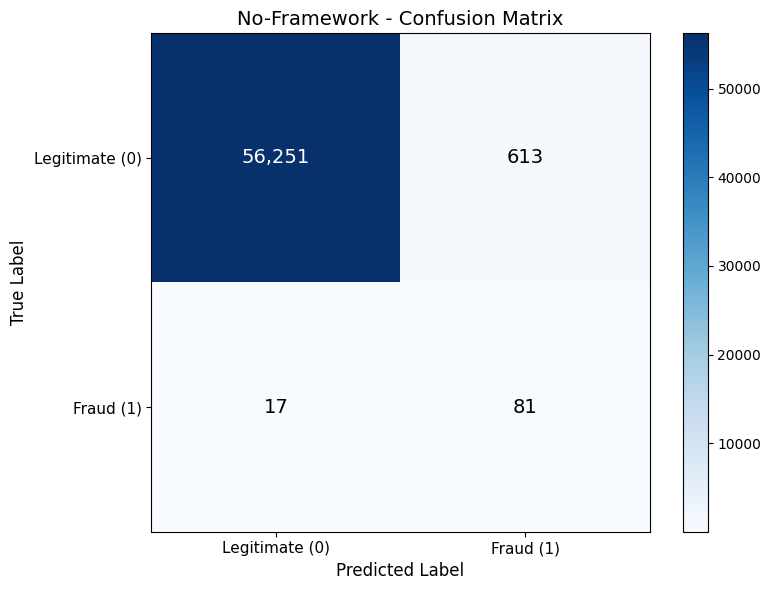

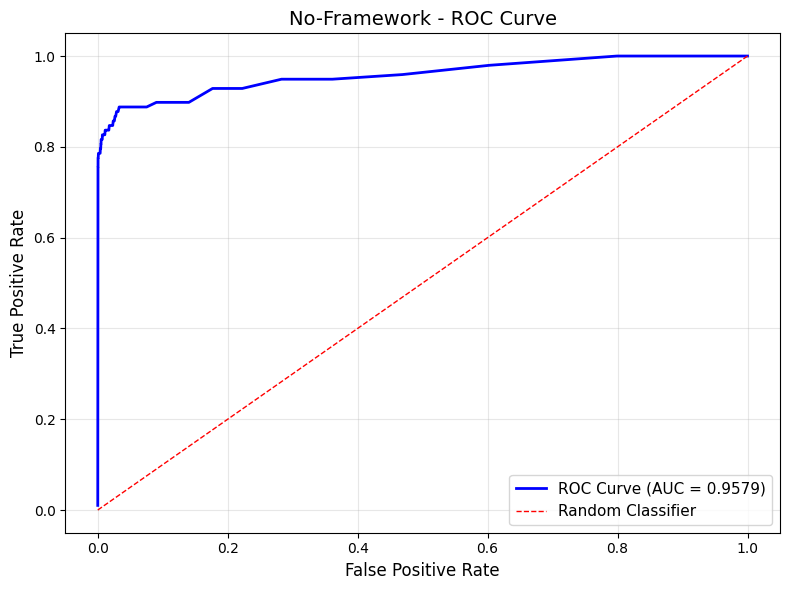

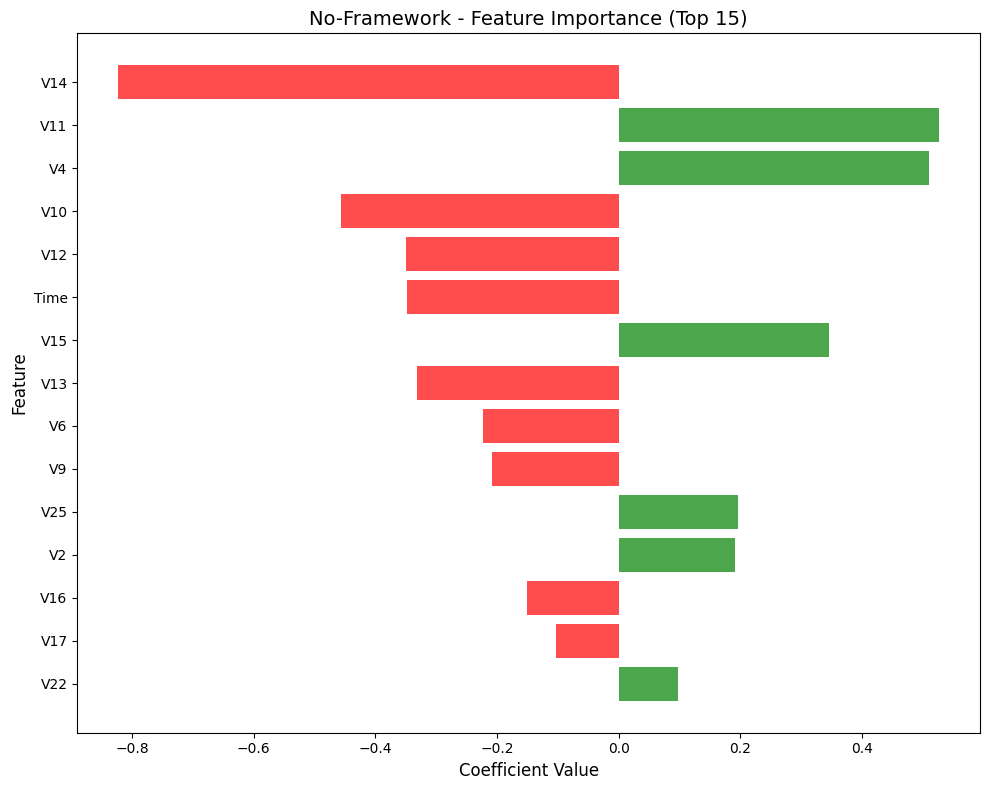

In [5]:
# Visualizations

# Cost curve - shows training convergence
plot_cost_curve(
    cost_history, 
    framework="No-Framework",
    save_path="results/cost_curve.png"
)

# Confusion matrix - shows prediction breakdown
plot_confusion_matrix(
    y_test, y_pred,
    framework="No-Framework",
    save_path="results/confusion_matrix.png"
)

# ROC curve - shows discrimination ability
plot_roc_curve(
    y_test, y_proba,
    framework="No-Framework",
    save_path="results/roc_curve.png"
)

# Feature importance - which features predict fraud
plot_feature_importance(
    weights, feature_names,
    framework="No-Framework",
    save_path="results/feature_importance.png"
)


In [6]:
# Final Summary

print("=" * 50)
print("NO-FRAMEWORK LOGISTIC REGRESSION - SUMMARY")
print("=" * 50)

print(f"\nHyperparameters:")
print(f"  Learning Rate: {learning_rate}")
print(f"  Iterations: {n_iterations}")

print(f"\nPerformance:")
print(f"  Training Time: {perf['time']:.2f} sec")
print(f"  Peak Memory: {perf['memory']:.2f} MB")

print(f"\nTest Metrics:")
print(f"  Accuracy:  {acc:.4f}")
print(f"  Precision: {prec:.4f}")
print(f"  Recall:    {rec:.4f}")
print(f"  F1 Score:  {f1:.4f}")
print(f"  AUC-ROC:   {auc:.4f}")

print(f"\nConfusion Matrix:")
print(f"  True Negatives:  {56251:,}")
print(f"  False Positives: {613:,}")
print(f"  False Negatives: {17:,}")
print(f"  True Positives:  {81:,}")

NO-FRAMEWORK LOGISTIC REGRESSION - SUMMARY

Hyperparameters:
  Learning Rate: 0.1
  Iterations: 1000

Performance:
  Training Time: 18.53 sec
  Peak Memory: 27.87 MB

Test Metrics:
  Accuracy:  0.9889
  Precision: 0.1167
  Recall:    0.8265
  F1 Score:  0.2045
  AUC-ROC:   0.9034

Confusion Matrix:
  True Negatives:  56,251
  False Positives: 613
  False Negatives: 17
  True Positives:  81
